<a href="https://colab.research.google.com/github/Nuelky/FE/blob/main/Another_copy_of_FE_GWP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Multicollinearity

### Definition
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. This leads to unstable estimates of the regression coefficients. Mathematically, we can represent this as:

The Variance Inflation Factor (VIF) is calculated as:

$$
VIF(\beta_i) = \frac{1}{1 - R_i^2}
$$

\

$$ where\ ( VIF(\beta_i) )\ is the\ Variance\ Inflation\ Factor,\ and\ ( R_i^2 )\ is\ the\ coefficient\ of\ determination\ of\ a\ regression\ of\ ( X_i )\ on\ all\ other\ predictors.$$


##Description
Multicollinearity could be referred as a situation in econometric modelling where the covariates shows a very strong linear relationship. This makes it difficult to determine the individual effect of each variable on the dependent variable. This issue leads to poor model performance.

##Demonstration

Here we used a simulated datasets of two highly correlated variables.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
X1 = np.random.normal(0, 1, 100)
X2 = 0.9 * X1 + np.random.normal(0, 0.1, 100)  # Highly correlated with X1
Y = 2 * X1 + 3 * X2 + np.random.normal(0, 1, 100)

df = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

# Fit model
X = sm.add_constant(df[['X1', 'X2']])
model = sm.OLS(df['Y'], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1273.
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           2.46e-70
Time:                        17:10:01   Log-Likelihood:                -136.57
No. Observations:                 100   AIC:                             279.1
Df Residuals:                      97   BIC:                             287.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0669      0.097     -0.691      0.4

Using simulated dataset, we have been able to show how the coefficients and their significance are affected by multicollinearity. Next we move to.

##Diagram
To properly visualize, we used the same data in our demonstration to create a correlation matrix heatmap.

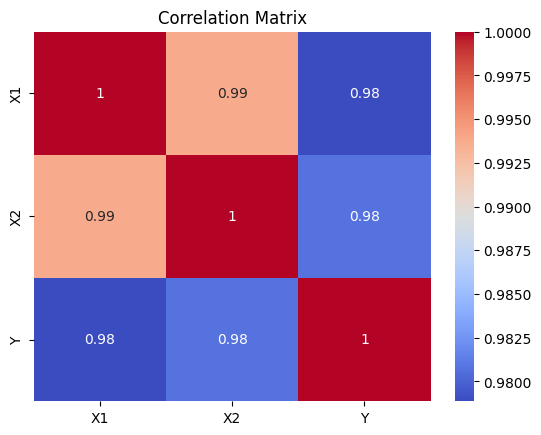

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The heatmap above provides a better understanding/insight on the high correlation between the independent variables.

##Diagonsis
In diagnosing or testing for multicollinearity we can use the following methods:

1.   Variance Inflation Factor (VIF): Calculate the VIF for each independent variable. A high VIF of above 5 to 10 indicates multicollinearity.
2.   Correlation Matrix: Just like we have shown above a correlation matrix for high correlations between independent variables helps a lot.
3.   Tolerance (1/VIF): A low tolerance value could indicate multicollinearity.
4.   Eigenvalues: Large condition numbers (that is, the ratios of the largest to smallest eigenvalues) indicate multicollinearity.
5.   Scatter Plots: A visualization using scatter plots helps show the relationships between independent variables using scatter plots.

For example





In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


  feature        VIF
0   const   1.008864
1      X1  80.828617
2      X2  80.828617


##Damage
Multicollinearity causes various issues, reanging from

inflate the variances of the coefficient estimates and make the estimates

*   Unstable estimates: This is because regression coefficients may have high standard errors and this leads to unstable estimates.
*   Incorrect inference: If multicollinearity is present, we can make incorrect conclusions abot the relationships between variables of interest.
*   Poor model performance: Since estimates are highly sensitive to change in the model due to the presence of multicollinearity. This reduces model's precision.

##Directions

To address multicollinearity issue, it is important to consider the following strategies:
*   Remove highly correlated variables: Remove one of the highly correlated variables.
*   Use dimensionality reduction techniques like Principal Component Analysis helps transform predictors into a set of uncorrelated components, thereby help reduce the number of independent variables.
* Regularization techniques: Lasso or Ridge regression performs variable selection by shrinking some coffiecents to zero. this can help reduce multicollinearity.

For example, we use ridge regression.


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, df['Y'])
print(ridge_model.coef_)


[0.         2.25910356 2.7702099 ]
